In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('wine_test.csv')

# 데이터 특징 확인
df.head()


,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    178 non-null    int64  
 1   alcohol                       176 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          173 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

- fixed acidity: 고정 산도
- volatile acidity: 휘발성 산도
- citric acid: 시트르산
- residual sugar: 잔류 설탕
- chlorides: 염화물
- free sulfur dioxide: 유리 아황산
- total sulfur dioxide: 총 아황산
- density: 밀도
- pH: pH 값
- sulphates: 황산염
- alcohol: 알코올 함량
- quality: 와인 품질 (0부터 10까지의 정수)

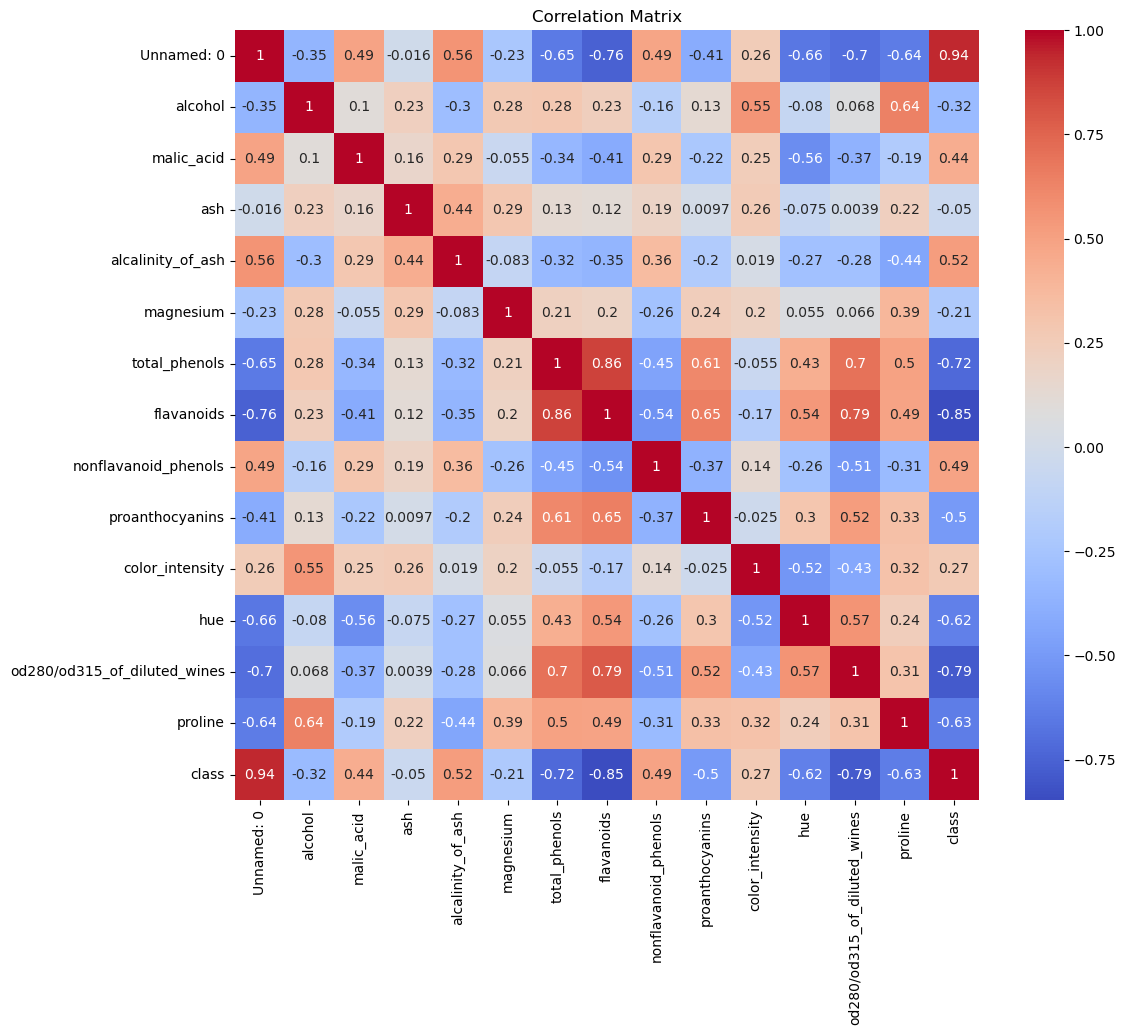

In [11]:
# 변수들 간의 상관 관계 분석
colormap = df.corr()

# 시각화
plt.figure(figsize=(12, 10))

sns.heatmap(colormap, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


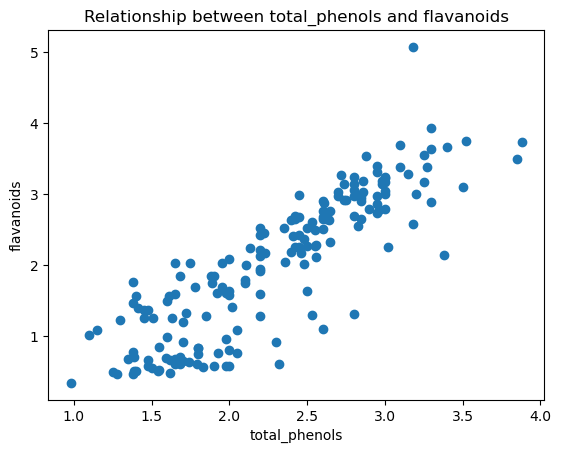

In [21]:
# total_phenols와 flavanoids 사이의 관계 시각화
plt.scatter(df['total_phenols'], df['flavanoids'])
plt.xlabel('total_phenols')
plt.ylabel('flavanoids')
plt.title('Relationship between total_phenols and flavanoids')
plt.show()

## 위 시각화 통해 알 수 있는것
- total_phenols 와 flavanoids 는 양의 선형 관계를 가짐
- 산점도 상에서 점들이 오른쪽 위로 향하는 경향을 보아 total_phenols 값이 증가할 수록 flavanoids 값도 증가하는 경향이 있다.
- 산점도 일부 total_phenols 값에서 flavanoids 값의 변동이 크게 보이지 않는것으로 오아 다른 변수의 영향이나 복잡한 상호작용이 존재할 수 있어 보인다.

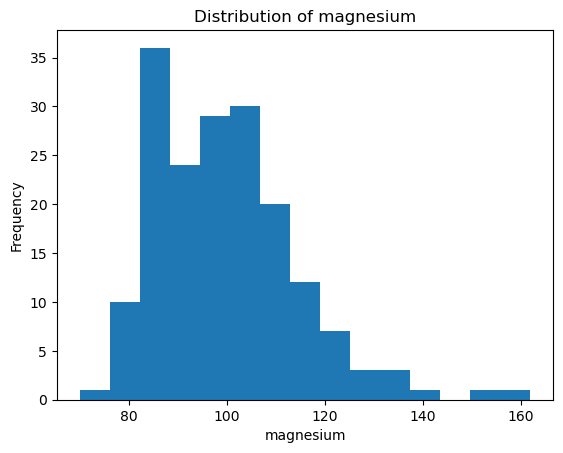

In [22]:
# magnesium의 분포 시각화
plt.hist(df['magnesium'], bins=15)
plt.xlabel('magnesium')
plt.ylabel('Frequency')
plt.title('Distribution of magnesium')
plt.show()

## 위 시각화 통해 알 수 있는것
- magnesium 변수의 분포는 오른쪽으로 치우친(right-skewed) 형태를 보인다. 이는 평균보다 큰 값들이 상대적으로 적은 빈도로 나타나는 것을 의미한다.
- 대부분의 샘플은 120 이하의 magnesium 값을 가지고 있으며. 이는 막대의 높이가 해당 값 범위에서 상대적으로 높게 나타나는 것을 확인할 수 있다.

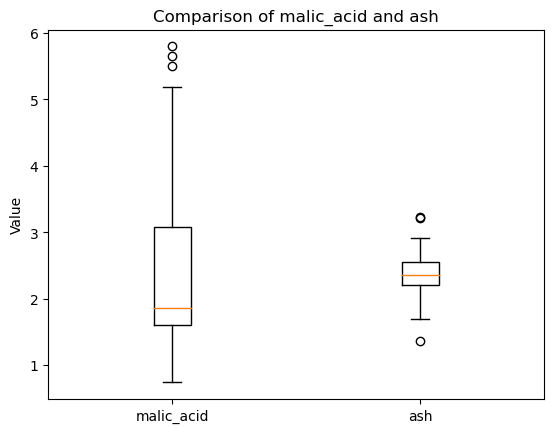

In [23]:
# malic_acid와 ash 변수의 상자 그림 비교
plt.boxplot([df['malic_acid'], df['ash']])
plt.xticks([1, 2], ['malic_acid', 'ash'])
plt.ylabel('Value')
plt.title('Comparison of malic_acid and ash')
plt.show()

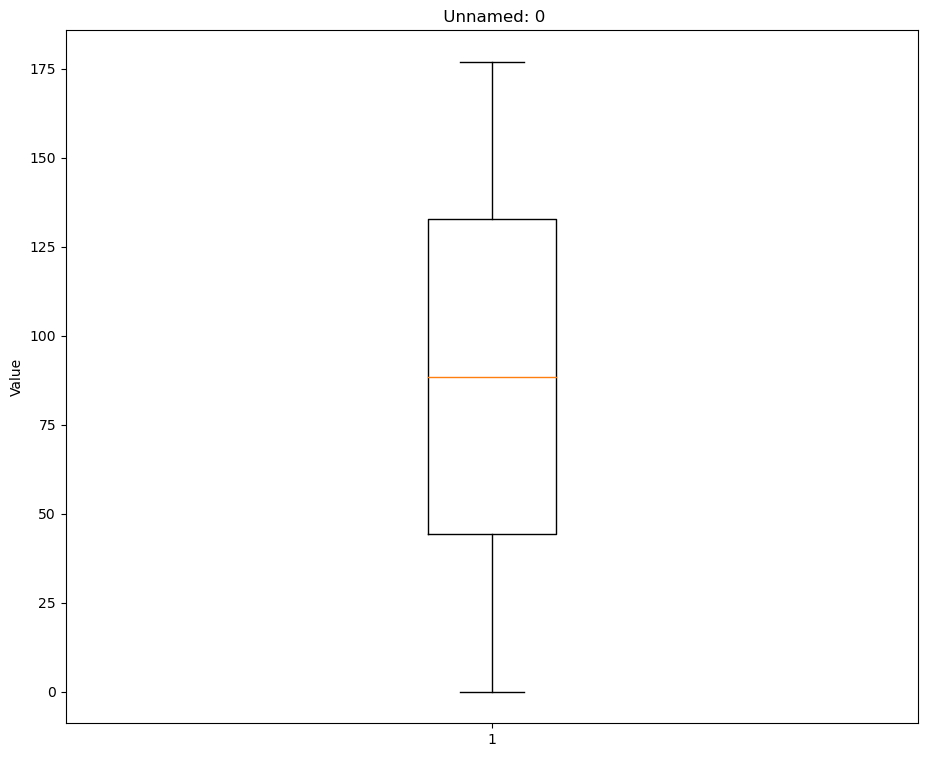

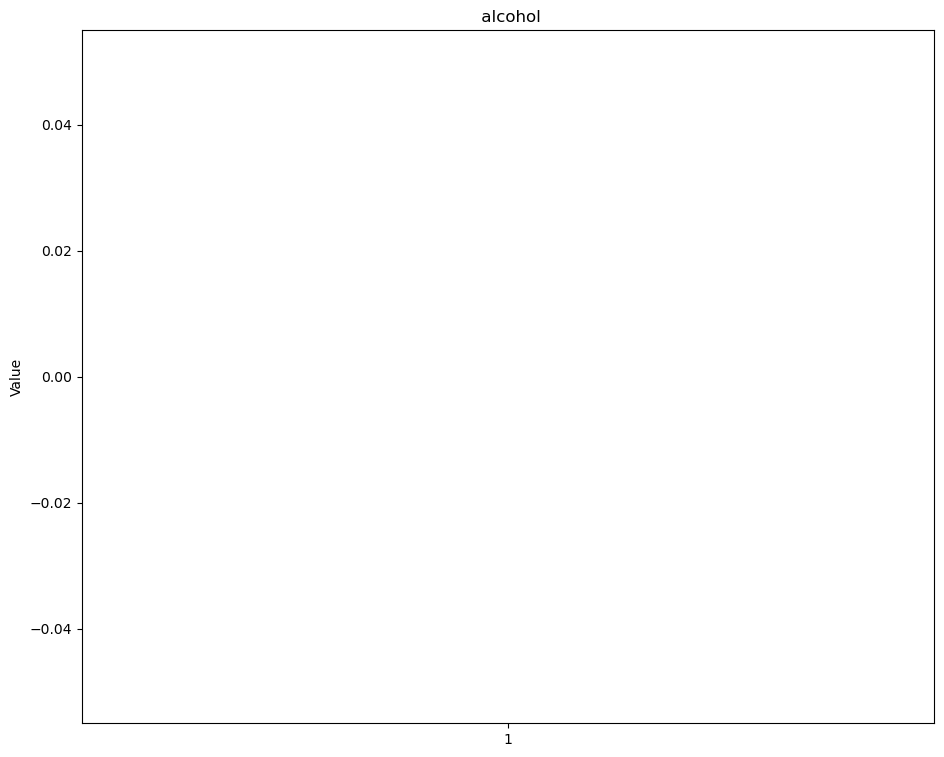

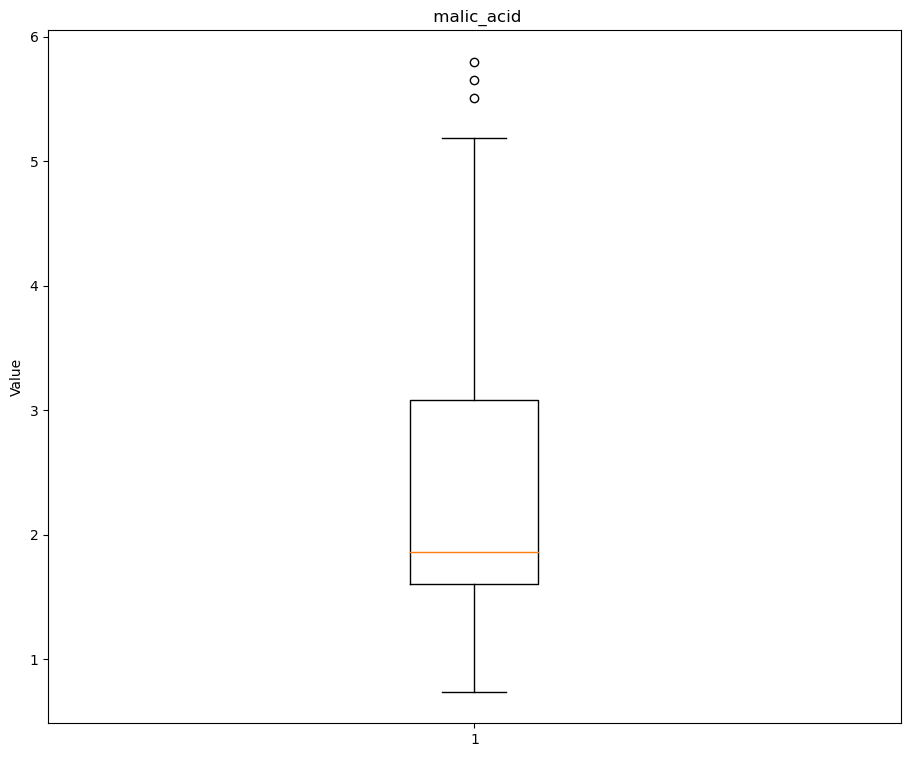

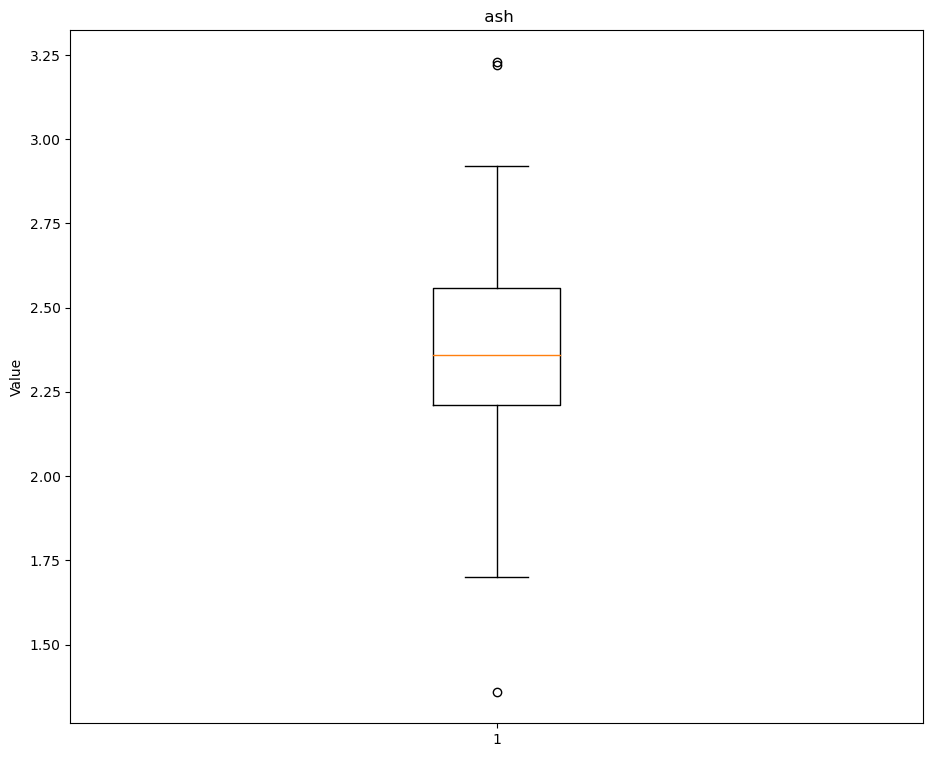

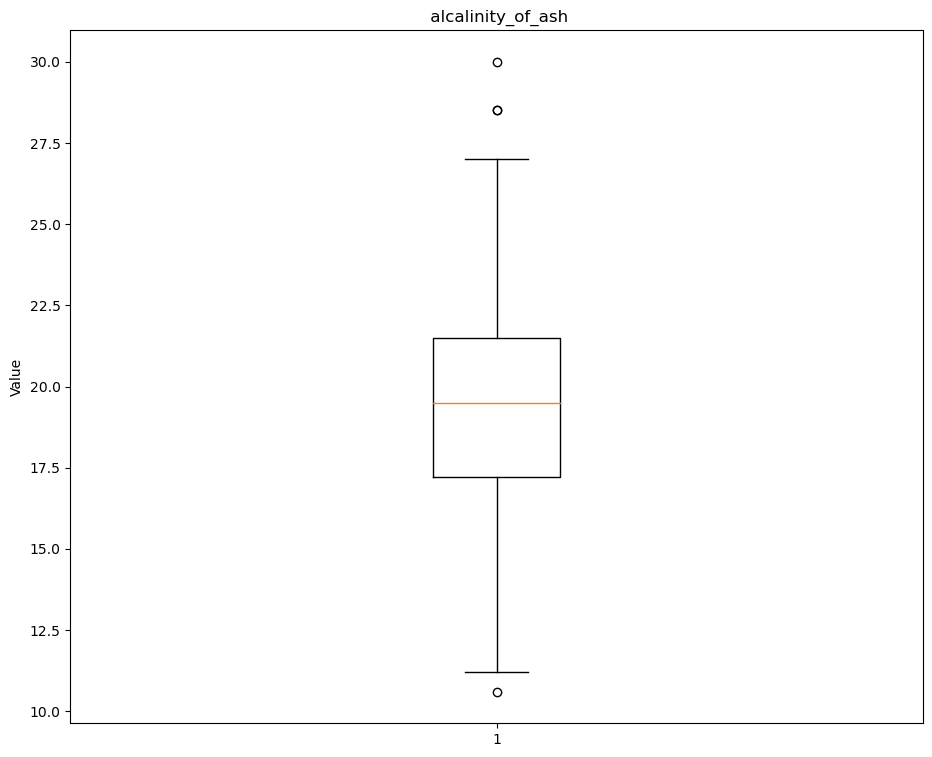

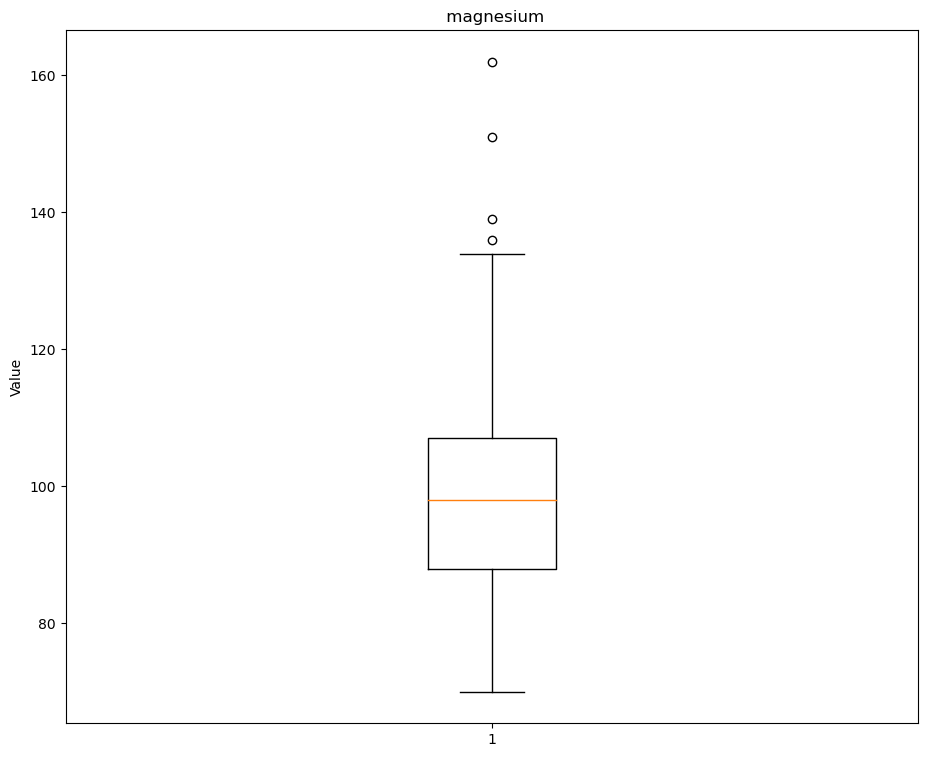

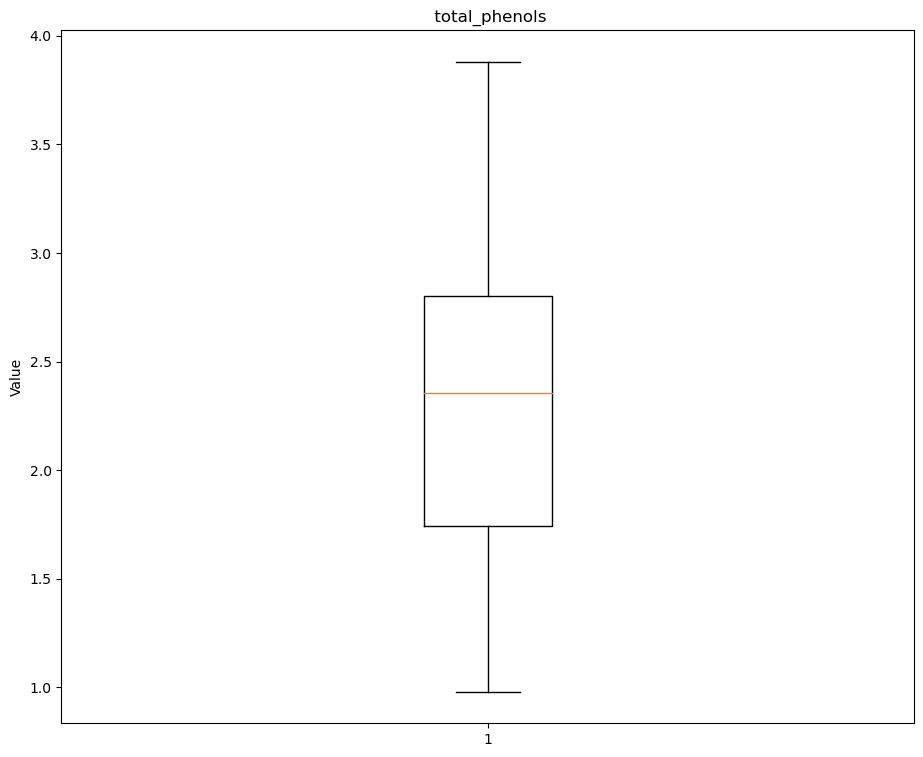

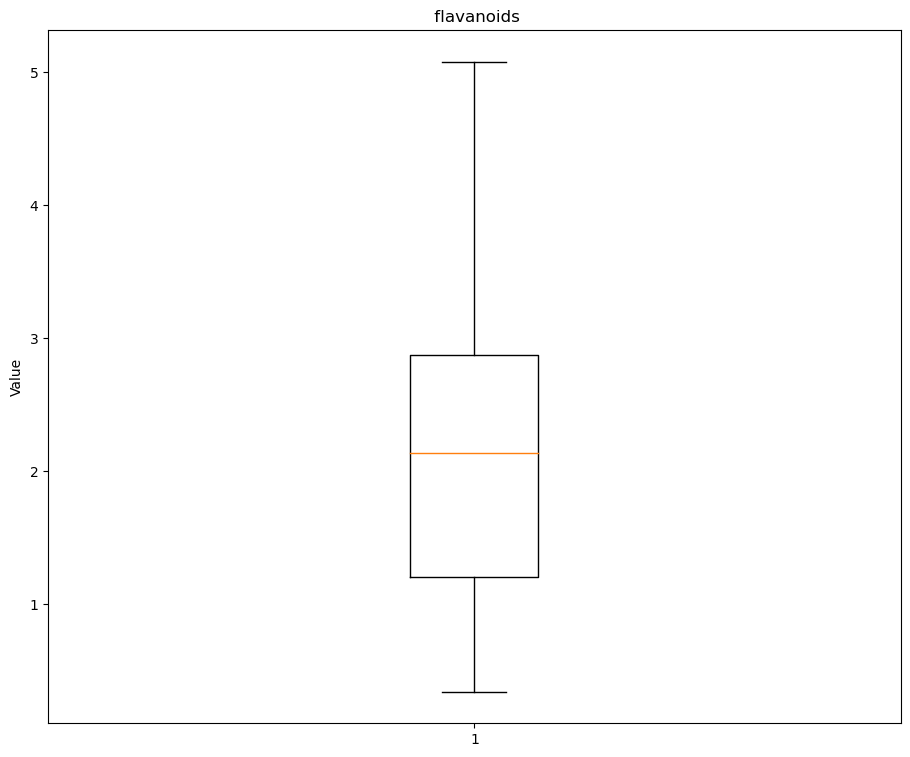

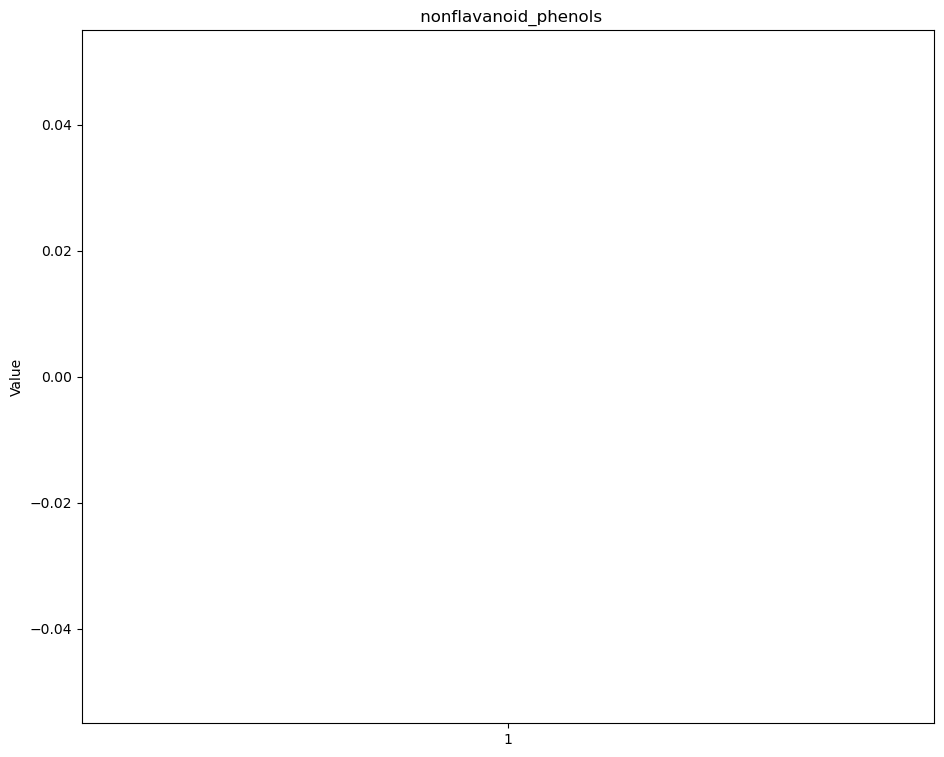

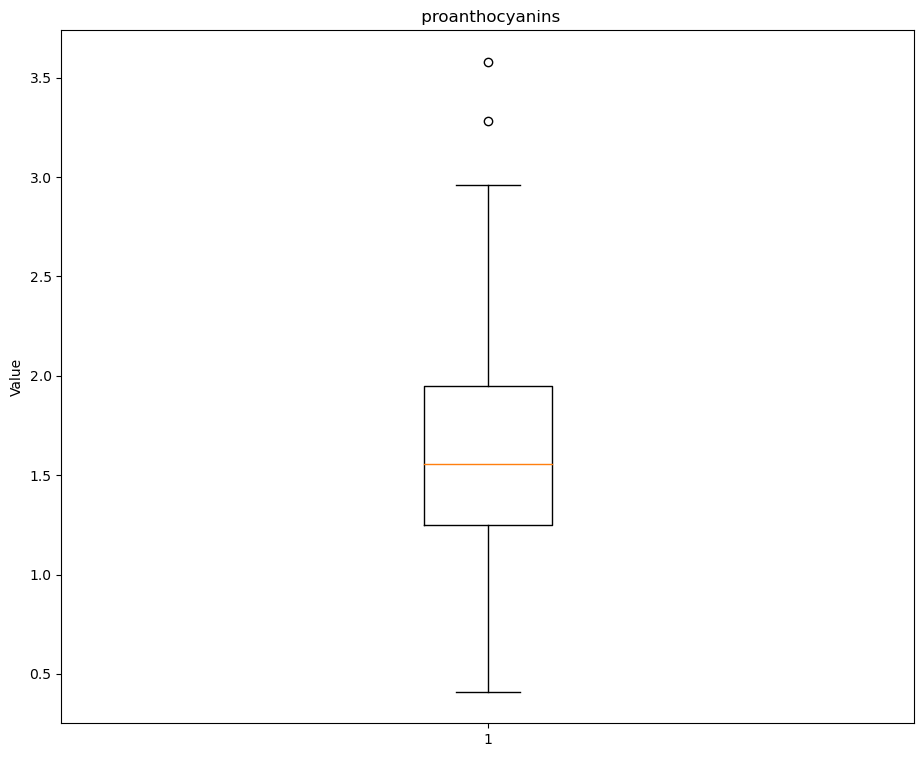

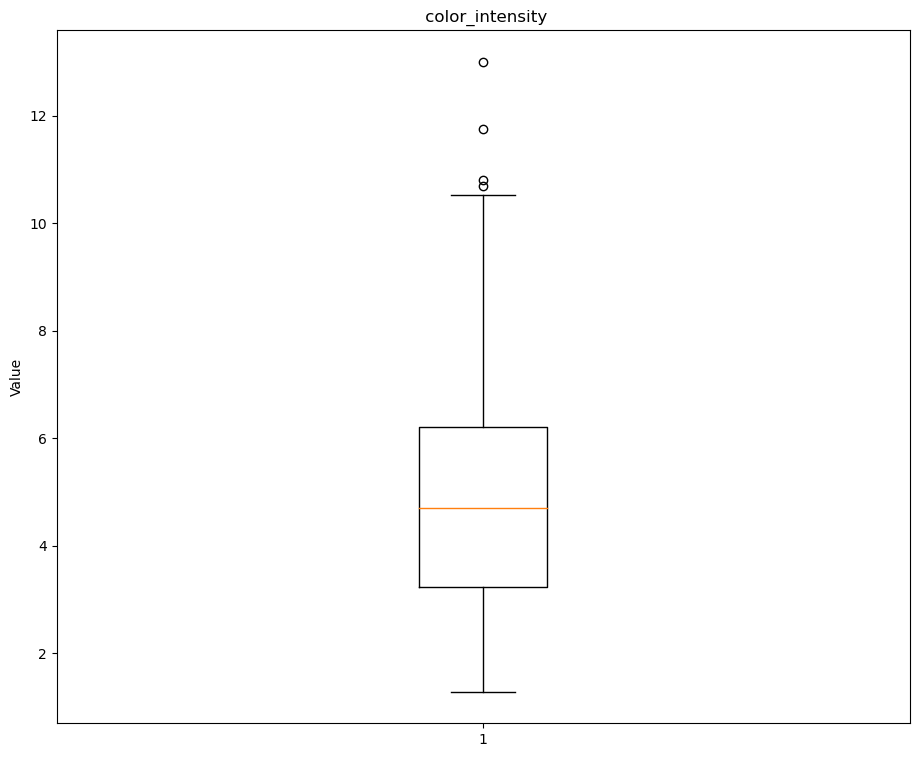

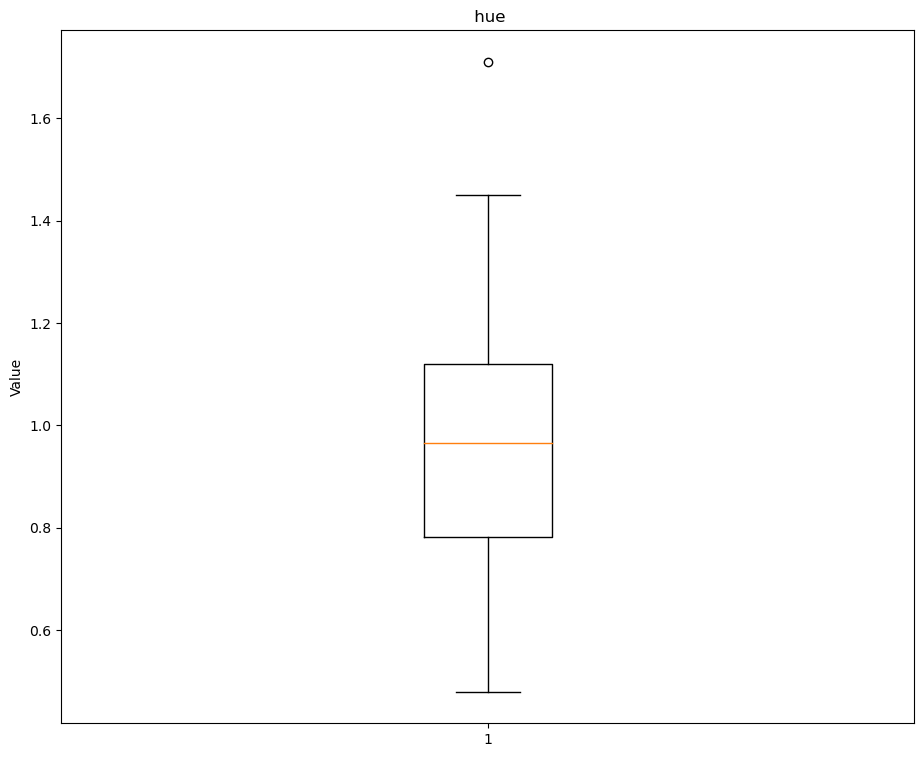

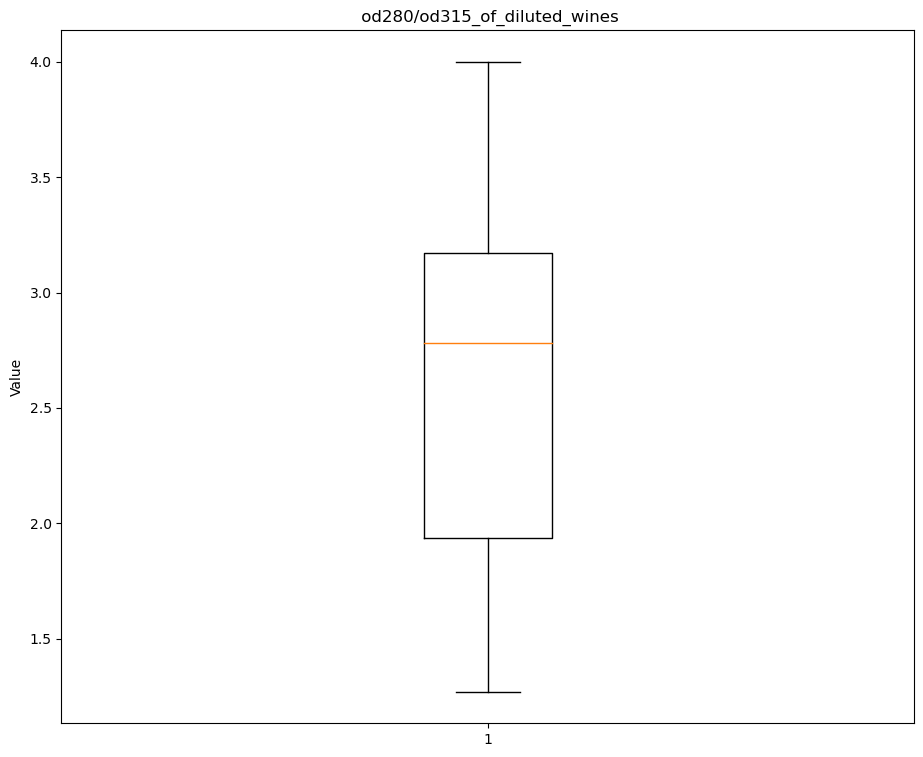

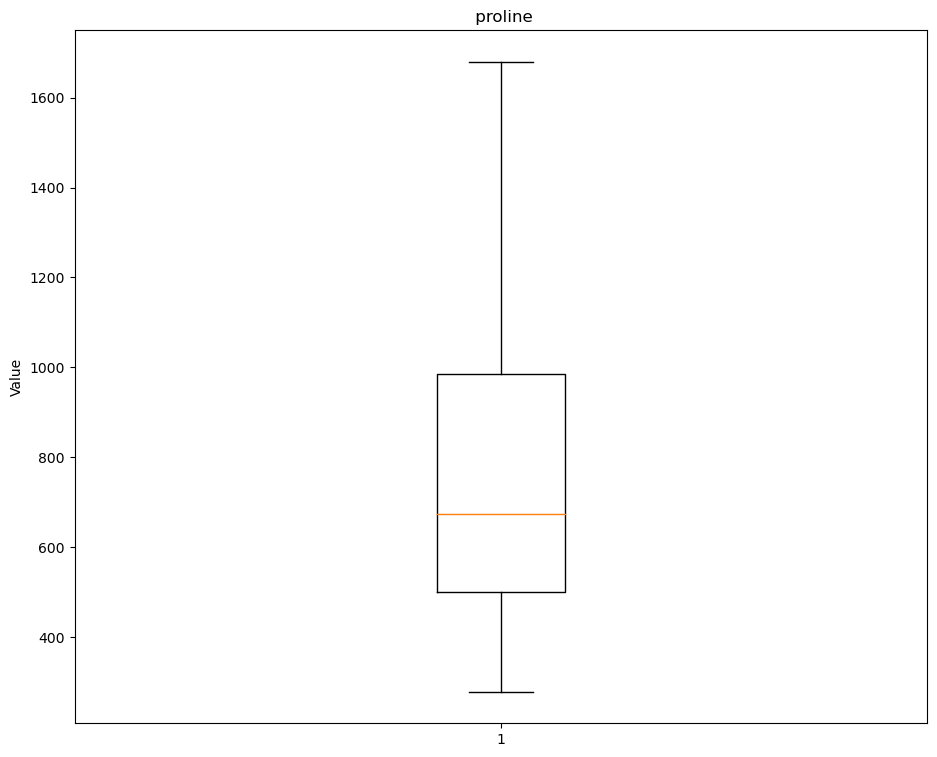

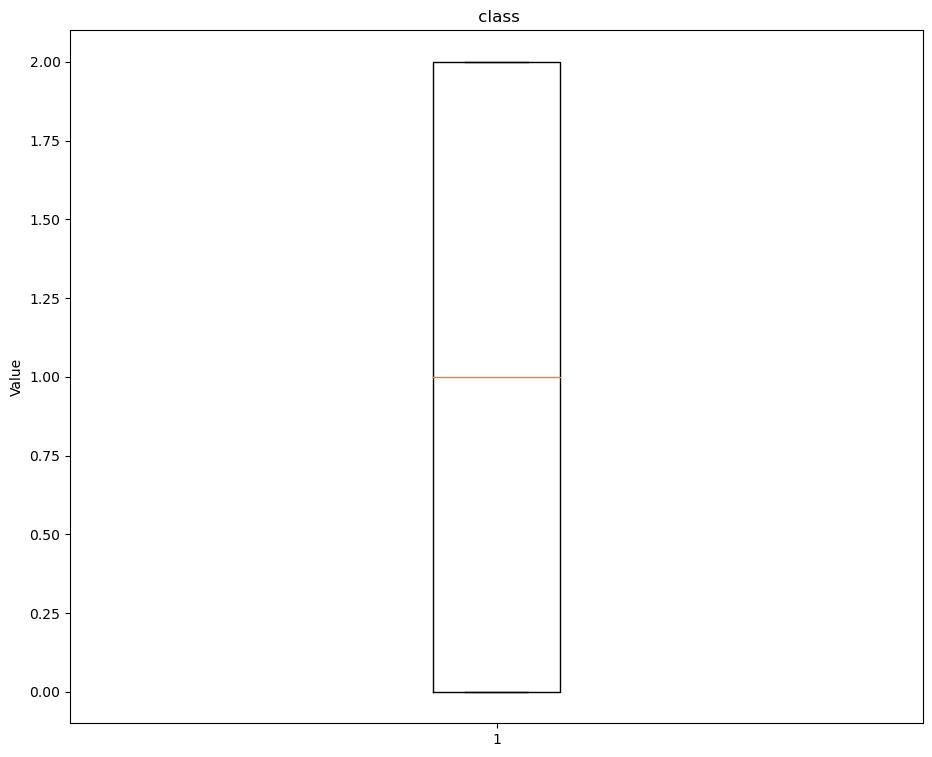

In [35]:
# 변수별 상자 그림 시각화
for column in df.columns:
    plt.figure(figsize=(11,9))
    
    plt.boxplot(df[column])
    plt.title(f'{column}')
    plt.ylabel('Value')
    plt.show()

위에서 alcohol와 nonflavoanoid_phenols 는 결측치가 존재하여 도형이 나오지 않는다.
이에 표준편차가 크지 않으므로 평균으로 결측치를 대체하자.

In [40]:
df['alcohol'].fillna(df['alcohol'].mean(), inplace=True)
df['nonflavanoid_phenols'].fillna(df['nonflavanoid_phenols'].mean(), inplace=True)

In [42]:
# 'Unnamed: 0' 열 제거
df.drop('Unnamed: 0', axis=1, inplace=True)

Unnamed: 0 열이 새롭게 생성되는 이유는 데이터를 CSV 파일로 저장할 때 인덱스가 함께 저장되기 때문에 데이터를 다시 불러올 때 이 인덱스 열이 Unnamed: 0 로 표시되어 출력됨으로 없애주면 좋다.

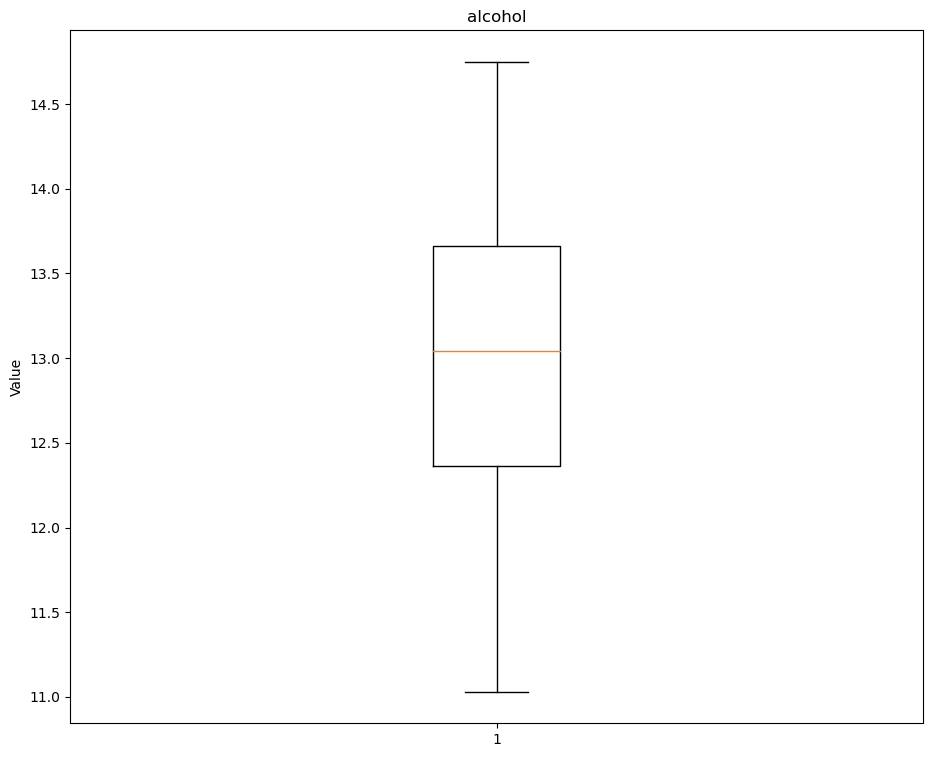

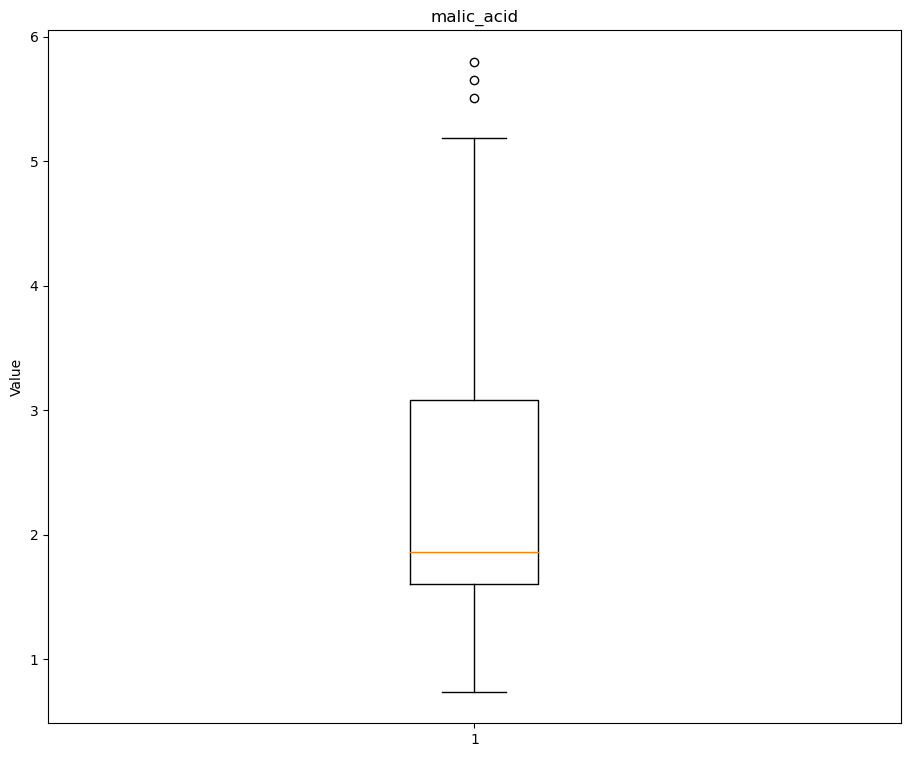

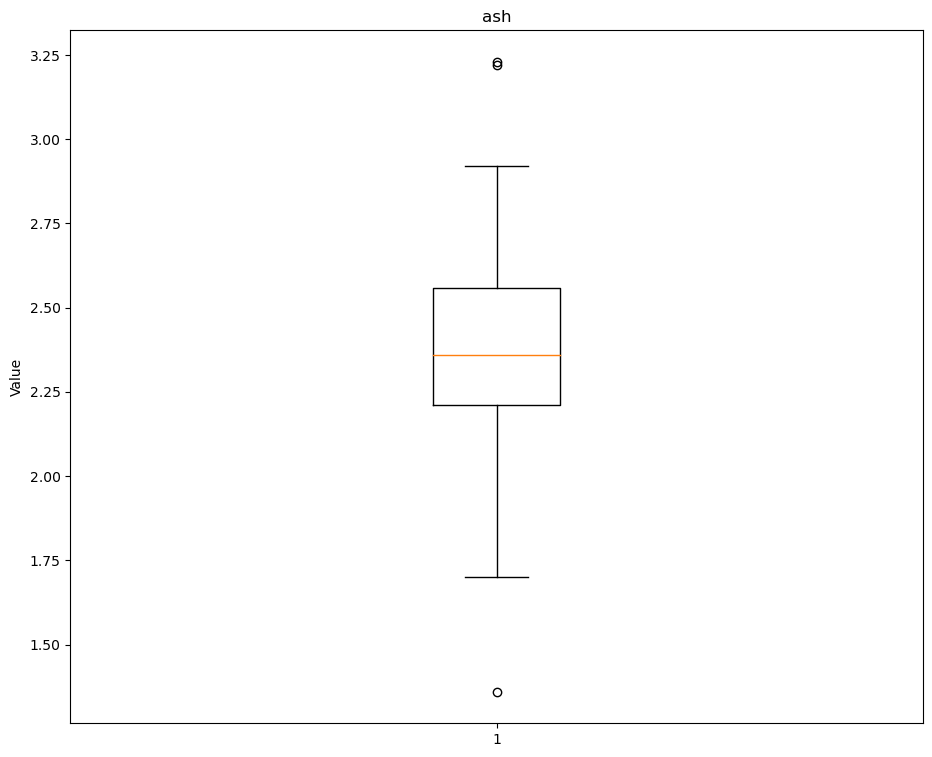

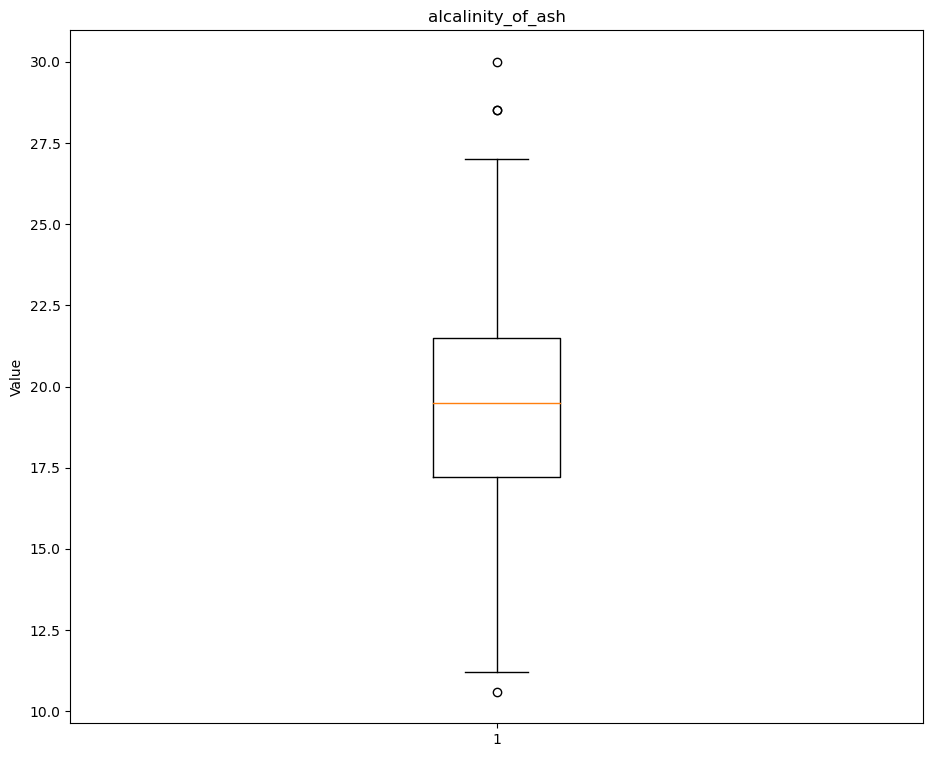

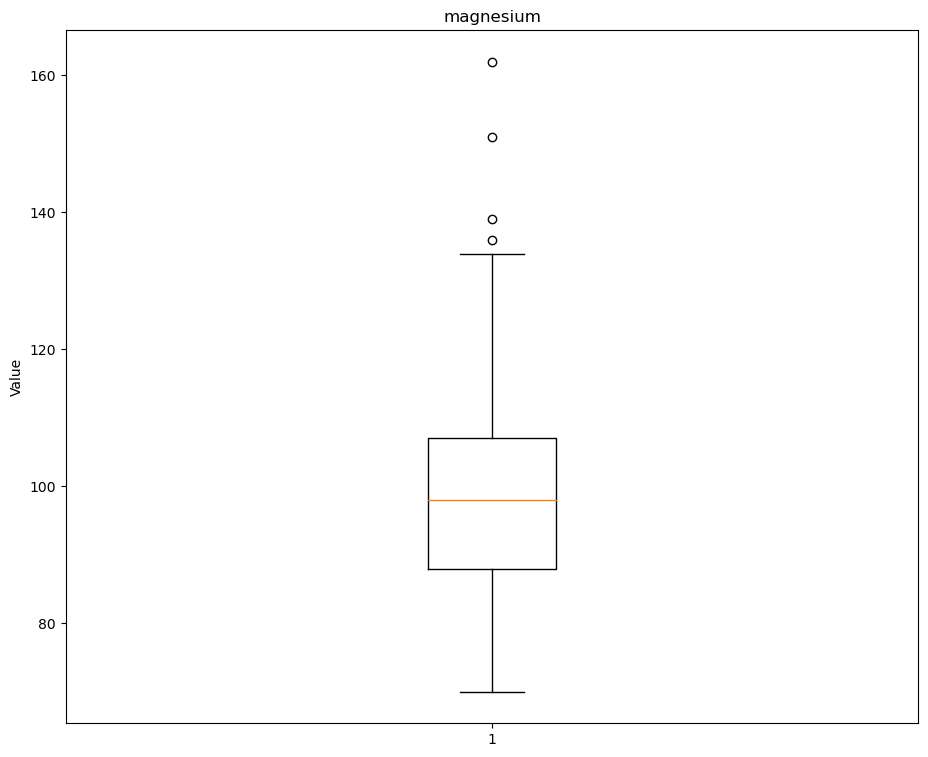

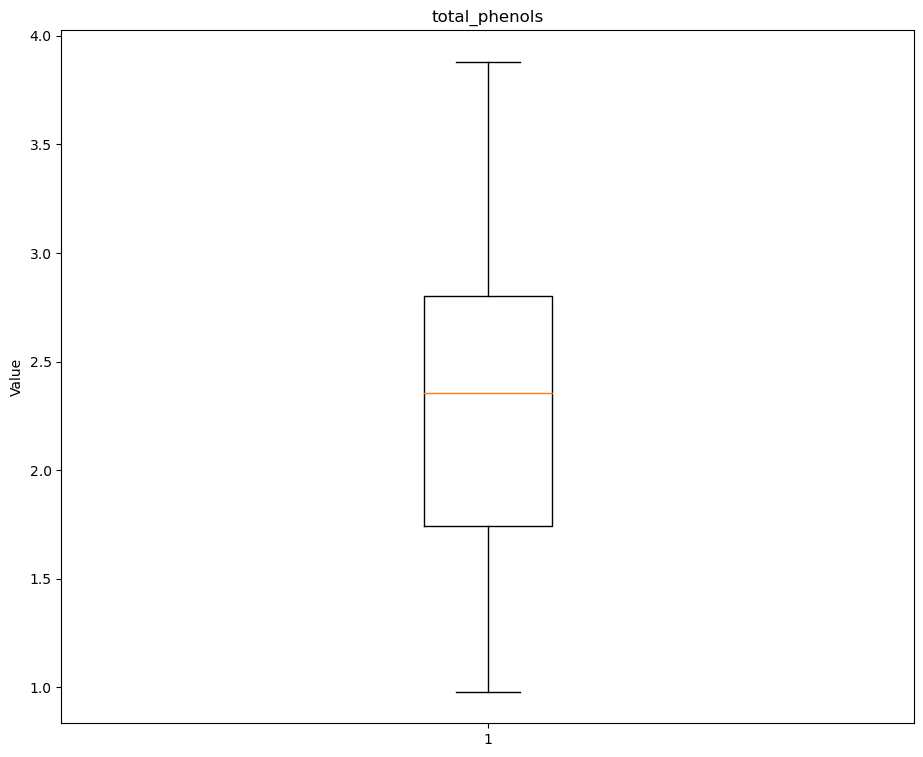

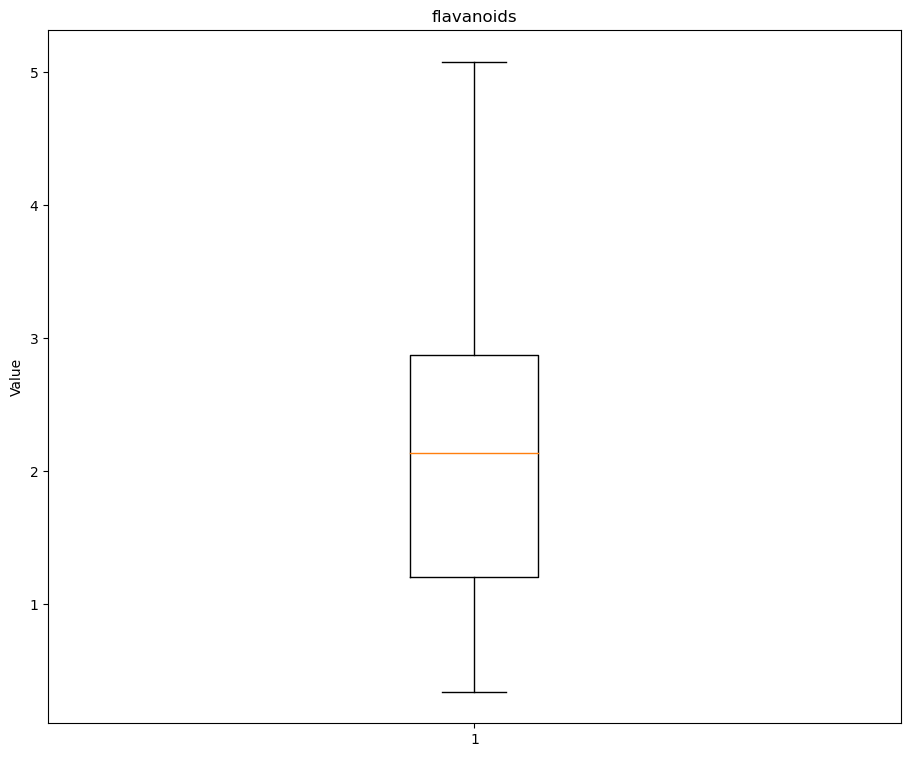

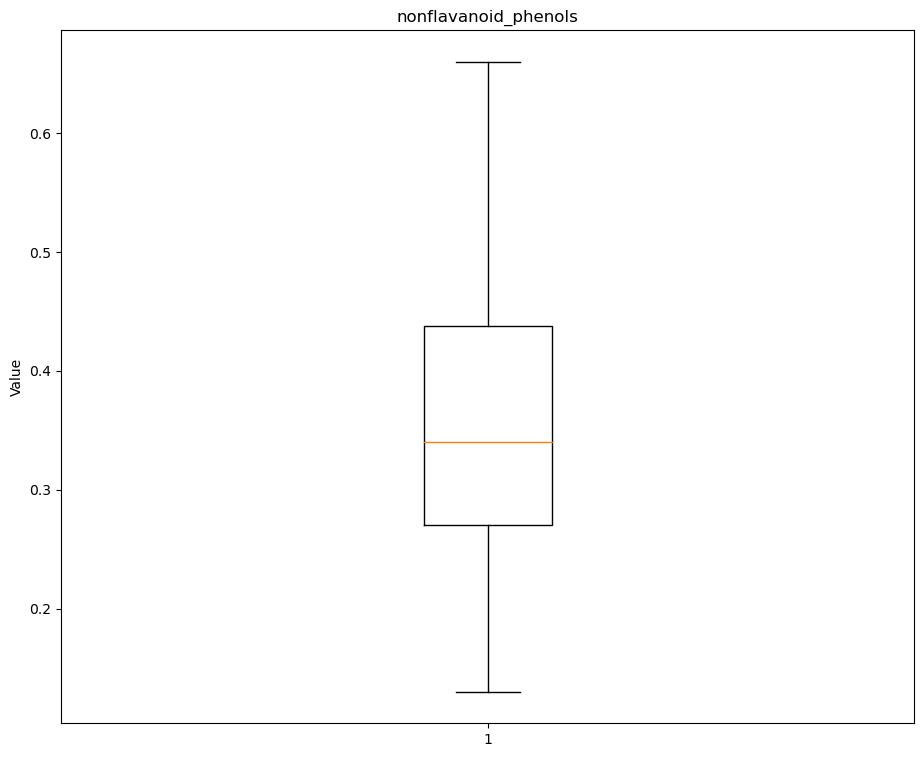

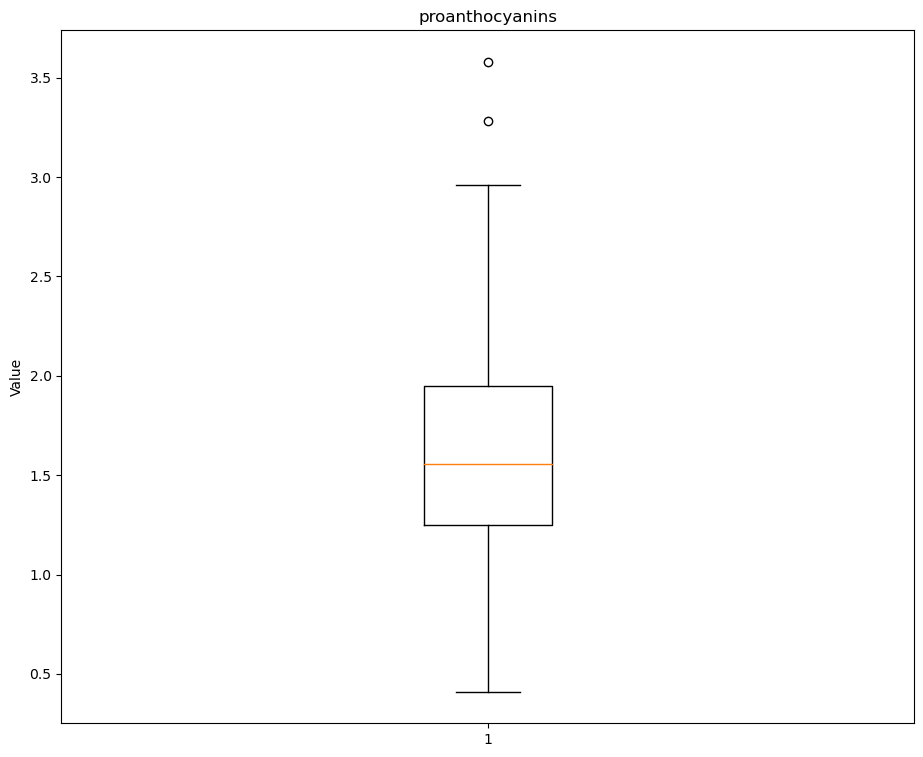

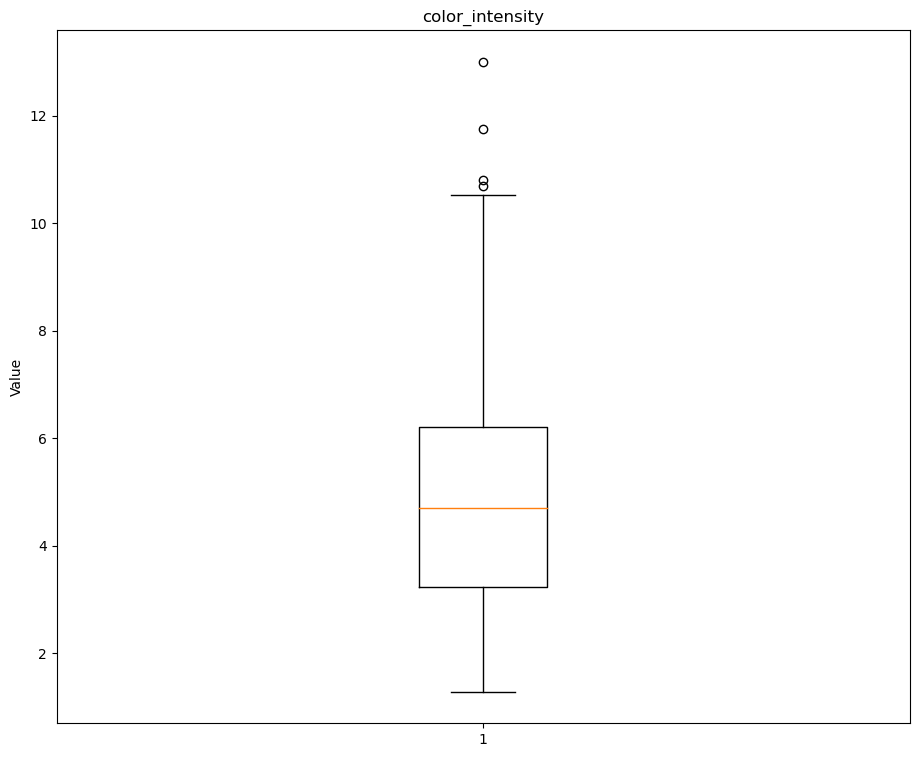

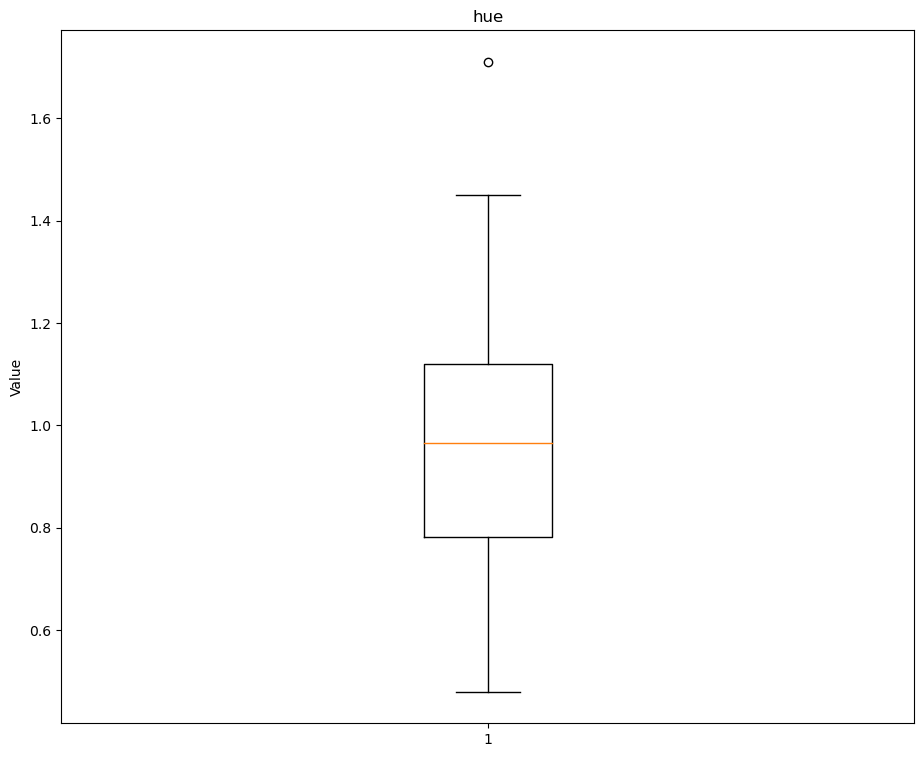

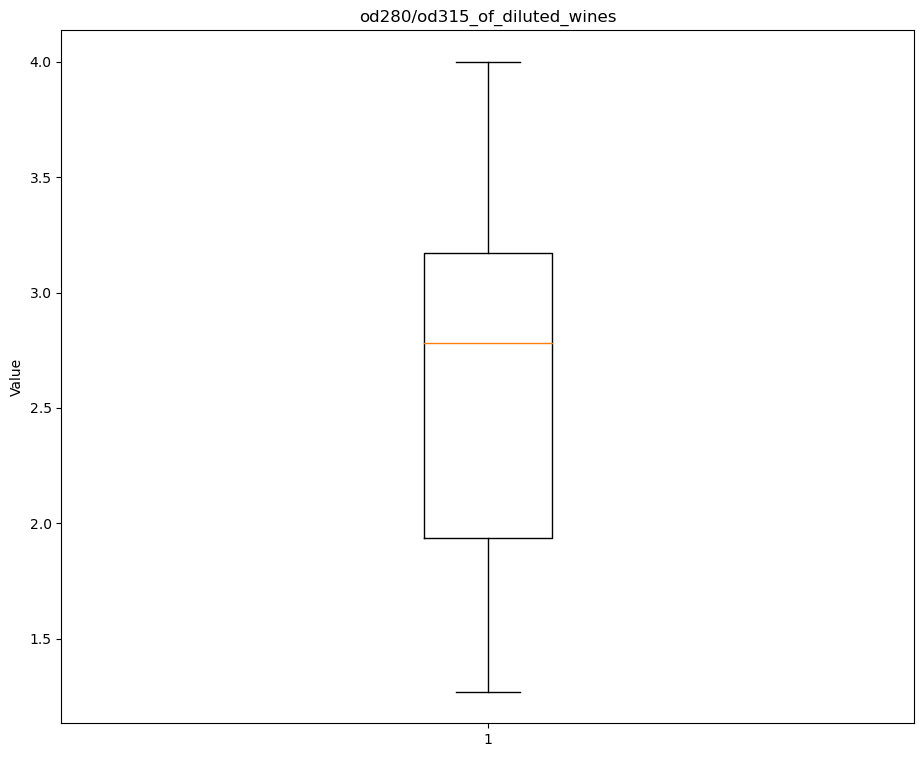

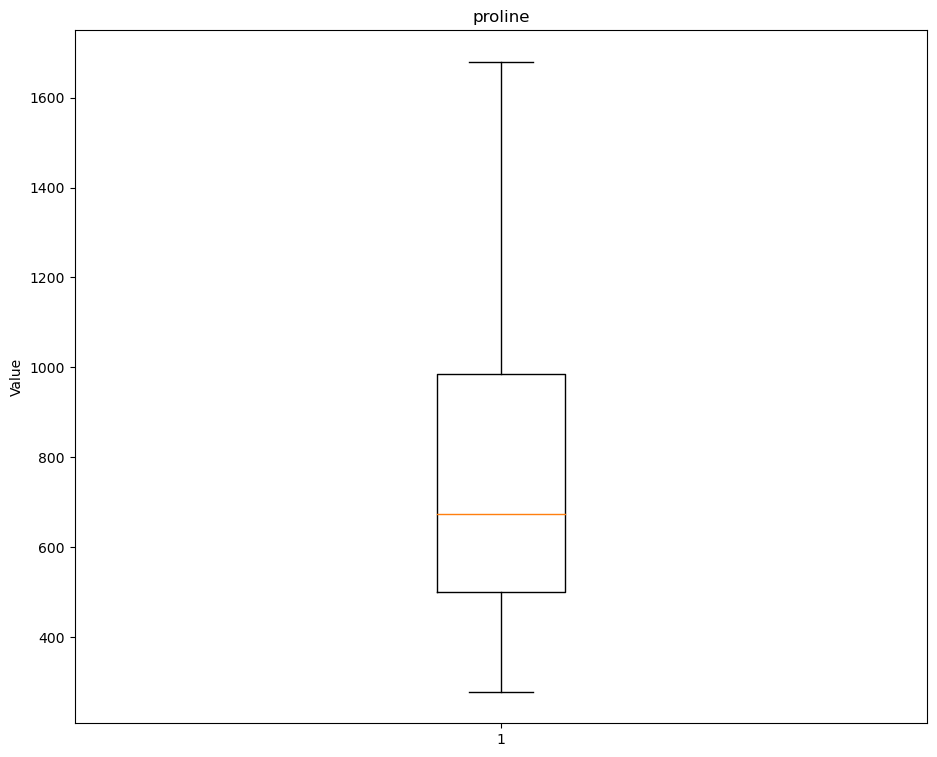

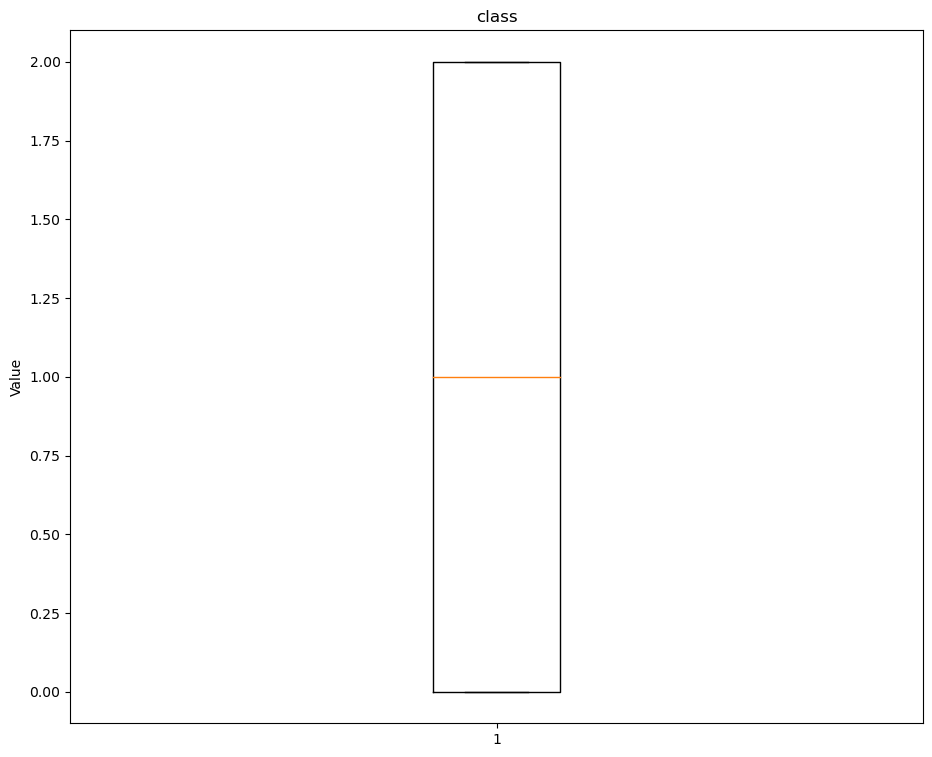

In [43]:
# 변수별 상자 그림 시각화
for column in df.columns:
    plt.figure(figsize=(11,9))
    
    plt.boxplot(df[column])
    plt.title(f'{column}')
    plt.ylabel('Value')
    plt.show()

## 위 시각화 통해 알 수 있는것
- 각 변수에 대한 상자 그림을 통해 해당 변수의 분포와 이상치를 시각적으로 확인 할 수 있다.
- 중앙값은 각 상자 그림의 가로선으로 표시되며, 변수의 중심 경향을 나타낸다.
- 상자는 변수의 1사분위수와 3사분위를 나타내고, 상자의 높이는 변수의 범위를 보여준다.
- 점으로 나타난 값들은 이상치로, 이상치는 전체 데이터 중에서 벗어난 극단적인 값이므로 변수의 분포에서 특이한 값들을 나타내게 된다.

- alcohol, total_phenols, flavanoids, non_flavanoids_phenols, od280/od315_of_diluted_wines, proline는 boxplot 상에서 이상치가 없는 것을 확인 할 수 있었다.

In [45]:
covariance = df['alcohol'].cov(df['flavanoids'])
print(f"Covariance between Alcohol and Flavanoids: {covariance}")

covariance = df['total_phenols'].cov(df['flavanoids'])
print(f"Covariance between total_phenols and Flavanoids: {covariance}")


Covariance between Alcohol and Flavanoids: 0.181274319465845
Covariance between total_phenols and Flavanoids: 0.5404704215070146


- 둘 다 양의 공분산을 가진다.
- total_phenolsl and Flavanoids의 공분산의 절대값이 더 큰 것으로 보아 선형 관계의 강도가 더 센것을 알 수 있따.

In [46]:
correlation = df['alcohol'].corr(df['flavanoids'])
print(f"Correlation between Alcohol and Flavanoids: {correlation}")

correlation = df['total_phenols'].corr(df['flavanoids'])
print(f"Correlation between total_phenols and Flavanoids: {correlation}")


Correlation between Alcohol and Flavanoids: 0.22688760866782917
Correlation between total_phenols and Flavanoids: 0.8645635000951148


- total_phenolsl and Flavanoids 상관계수로 보았을 때 total_phenolsl and Flavanoids 더 1에 가까우므로 양의 선형 관계가 더 큰것을 알 수 있다.